# Bengaluru House Price Predition

## Problem Statement

The real estate market in Bengaluru is diverse, with property prices influenced by multiple factors such as location, size, number of bathrooms, and availability. Accurately predicting house prices can help buyers, sellers, and investors make informed decisions. This project aims to build a predictive model to estimate house prices in Bengaluru based on various property features.

## Features :

1. area_type – The type of area (Super built-up, Built-up, Plot, etc.).
2. availability – The availability status of the property (e.g., Ready to Move, specific date).
3. location – The location of the property in Bengaluru.
4. size – The number of bedrooms (BHK) or the size of the house.
5. society – The name of the society (may have many missing values).
6. total_sqft – The total area of the property in square feet.
7. bath – The number of bathrooms.
8. balcony – The number of balconies.

## Target Variable

* Price - The price of the property (in lakhs)

In [1]:
import pandas as pd
df = pd.read_csv("/content/bengaluru_house_prices.csv")

# Understanding Data

In [2]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [4]:
df.sample()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
3582,Super built-up Area,Ready To Move,HSR Layout,2 BHK,SruntFa,1127,2.0,1.0,68.0


In [5]:
df.shape

(13320, 9)

In [6]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [8]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [9]:
df.nunique()

,0
area_type,4
availability,81
location,1305
size,31
society,2688
total_sqft,2117
bath,19
balcony,4
price,1994


In [10]:
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [11]:
df.value_counts()

area_type             availability   location                        size   society  total_sqft   bath  balcony  price 
Super built-up  Area  Ready To Move  Haralur Road                    2 BHK  RInceeg  1243         2.0   2.0      46.00     10
                                     HSR Layout                      2 BHK  NRosete  1140         2.0   2.0      46.00      9
                                     Parappana Agrahara              2 BHK  Peide L  1194         2.0   2.0      47.00      7
                      21-Dec         Kanakpura Road                  3 BHK  PrarePa  1100         3.0   2.0      53.00      5
                      Ready To Move  Raja Rajeshwari Nagar           2 BHK  GrrvaGr  1196         2.0   2.0      40.54      5
                                                                                                                           ..
                      19-Dec          Bhoganhalli                    1 RK   Rosha I  296          1.0   0.0      22.89      1
                      19-Aug         Yelahanka                       2 BHK  SMllay   1180 - 1630  2.0   0.0      50.58      1
                                     Kengeri                         1 BHK  VBn 2lm  540          1.0   1.0      22.50      1
                                                                                     416          1.0   1.0      19.50      1
                      Ready To Move  Yeshwanthpur Industrial Suburb  2 BHK  Essic C  1415         2.0   2.0      120.00     1
Name: count, Length: 7144, dtype: int64

# Data Cleaning

In [12]:
df1 = df.copy()

In [13]:
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [14]:
df1.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [15]:
df1.drop(columns=['society'],inplace=True)

In [16]:
df1['location'].mode()


,location
0,Whitefield


In [17]:
df1['location'].fillna(df1['location'].mode()[0],inplace=True)

<ipython-input-17-b8efb4d1ba50>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['location'].fillna(df1['location'].mode()[0],inplace=True)


In [18]:
df1['size'].fillna(df['size'].mode()[0],inplace=True)

<ipython-input-18-3c2339beb2af>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['size'].fillna(df['size'].mode()[0],inplace=True)


In [19]:
df1['bath'].fillna(df['bath'].median(),inplace=True)

<ipython-input-19-a2ba0e1ac0f0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['bath'].fillna(df['bath'].median(),inplace=True)


In [20]:
df1['balcony'].fillna(df['balcony'].mean(),inplace=True)

<ipython-input-20-3987d0b13575>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['balcony'].fillna(df['balcony'].mean(),inplace=True)


In [21]:
df1.isnull().sum()

,0
area_type,0
availability,0
location,0
size,0
total_sqft,0
bath,0
balcony,0
price,0


In [22]:
df1.duplicated().sum()

568

In [23]:
df1.drop_duplicates(inplace=True)

In [24]:
print(df.shape)
print(df1.shape)

(13320, 9)
(12752, 8)


In [25]:
df1

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.000000,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.000000,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.000000,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.000000,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.000000,51.00
...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,1715,3.0,3.000000,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.000000,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.584376,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.00


In [26]:
df1['total_sqft'] = df1['total_sqft'].str.extract(r'(\d+\.?\d*)')

In [27]:
df1['total_sqft'] = df1['total_sqft'].astype('float')

In [28]:
df1['size'] = df1['size'].str.extract(r'(\d+\.?\d*)')

In [29]:
df1['size'].unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [30]:
df1['size']=df1['size'].astype("int")
df1.dtypes

,0
area_type,object
availability,object
location,object
size,int64
total_sqft,float64
bath,float64
balcony,float64
price,float64


# Data Visulation

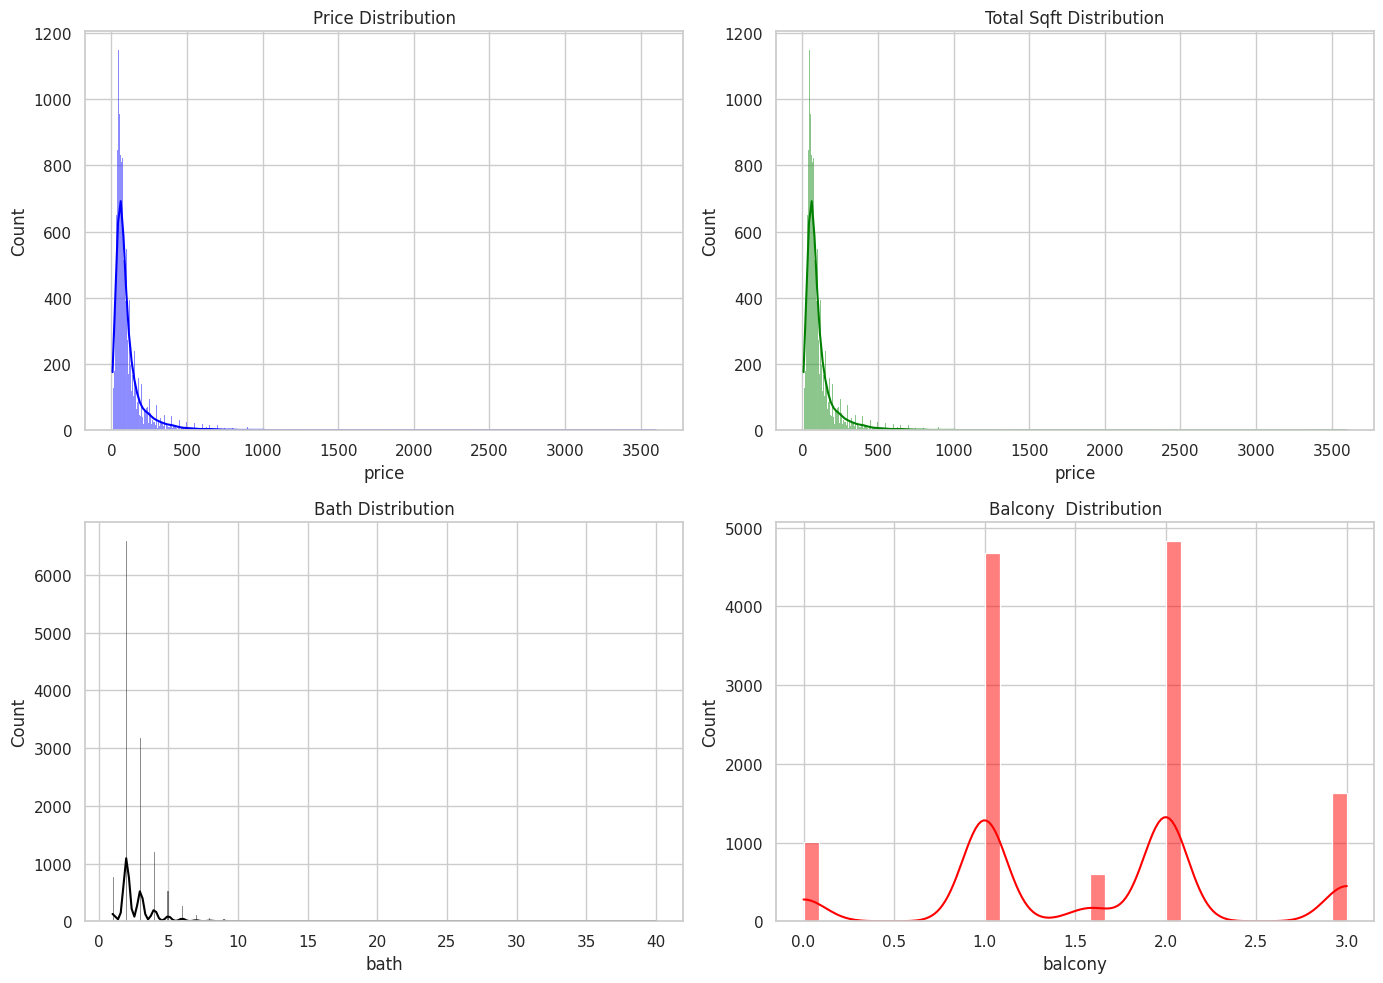

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')
fig, axes = plt.subplots(2,2, figsize=(14 ,10))

#Price Distribution
sns.histplot(df1['price'],kde=True,color='blue',ax=axes[0,0])
axes[0,0].set_title("Price Distribution")

#Total Sqrt Distribution
sns.histplot(df1['price'],kde=True,color='green',ax=axes[0,1])
axes[0,1].set_title("Total Sqft Distribution")

#bath Distribution
sns.histplot(df1['bath'],kde=True,color='black',ax=axes[1,0])
axes[1,0].set_title("Bath Distribution")

# Balcony distribution
sns.histplot(df1['balcony'],kde=True,color='red',ax=axes[1,1])
axes[1,1].set_title("Balcony  Distribution")

plt.tight_layout()
plt.show()

<ipython-input-32-4d522745e831>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='area_type',y='price',data=df1,palette="Set2")
<ipython-input-32-4d522745e831>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='area_type',y='total_sqft',data=df1,palette="Set2")
<ipython-input-32-4d522745e831>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='area_type',y='bath',data=df1,palette="Set2")
<ipython-input-32-4d522745e831>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the

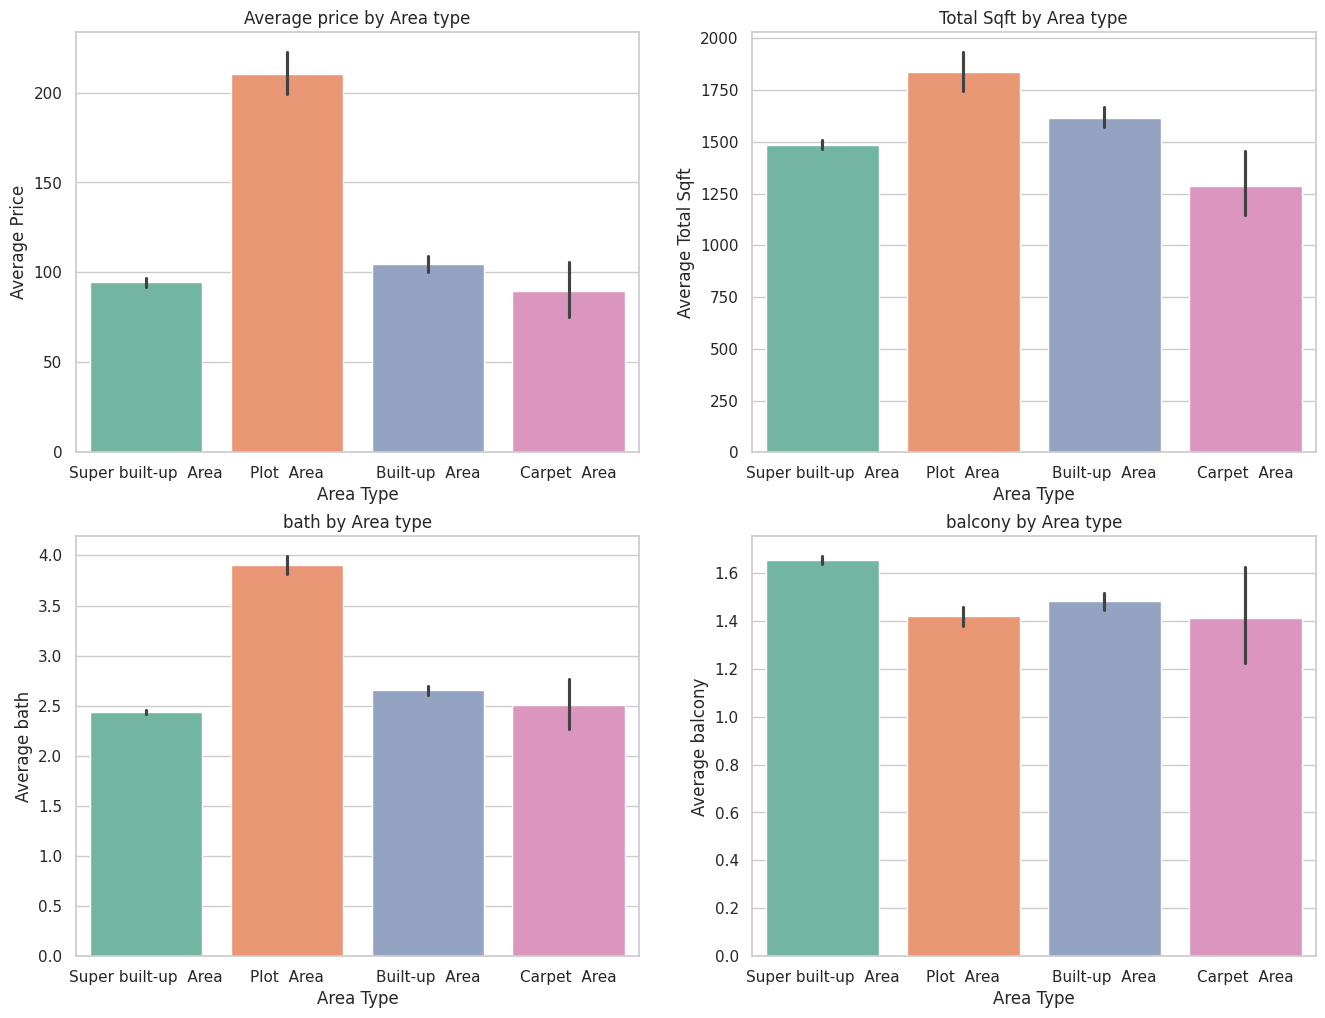

In [32]:
plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
sns.barplot(x='area_type',y='price',data=df1,palette="Set2")
plt.title('Average price by Area type')
plt.xlabel("Area Type")
plt.ylabel("Average Price")

plt.subplot(2,2,2)
sns.barplot(x='area_type',y='total_sqft',data=df1,palette="Set2")
plt.title('Total Sqft by Area type')
plt.xlabel("Area Type")
plt.ylabel("Average Total Sqft")

plt.subplot(2,2,3)
sns.barplot(x='area_type',y='bath',data=df1,palette="Set2")
plt.title('bath by Area type')
plt.xlabel("Area Type")
plt.ylabel("Average bath")

plt.subplot(2,2,4)
sns.barplot(x='area_type',y='balcony',data=df1,palette="Set2")
plt.title('balcony by Area type')
plt.xlabel("Area Type")
plt.ylabel("Average balcony")

plt.show()


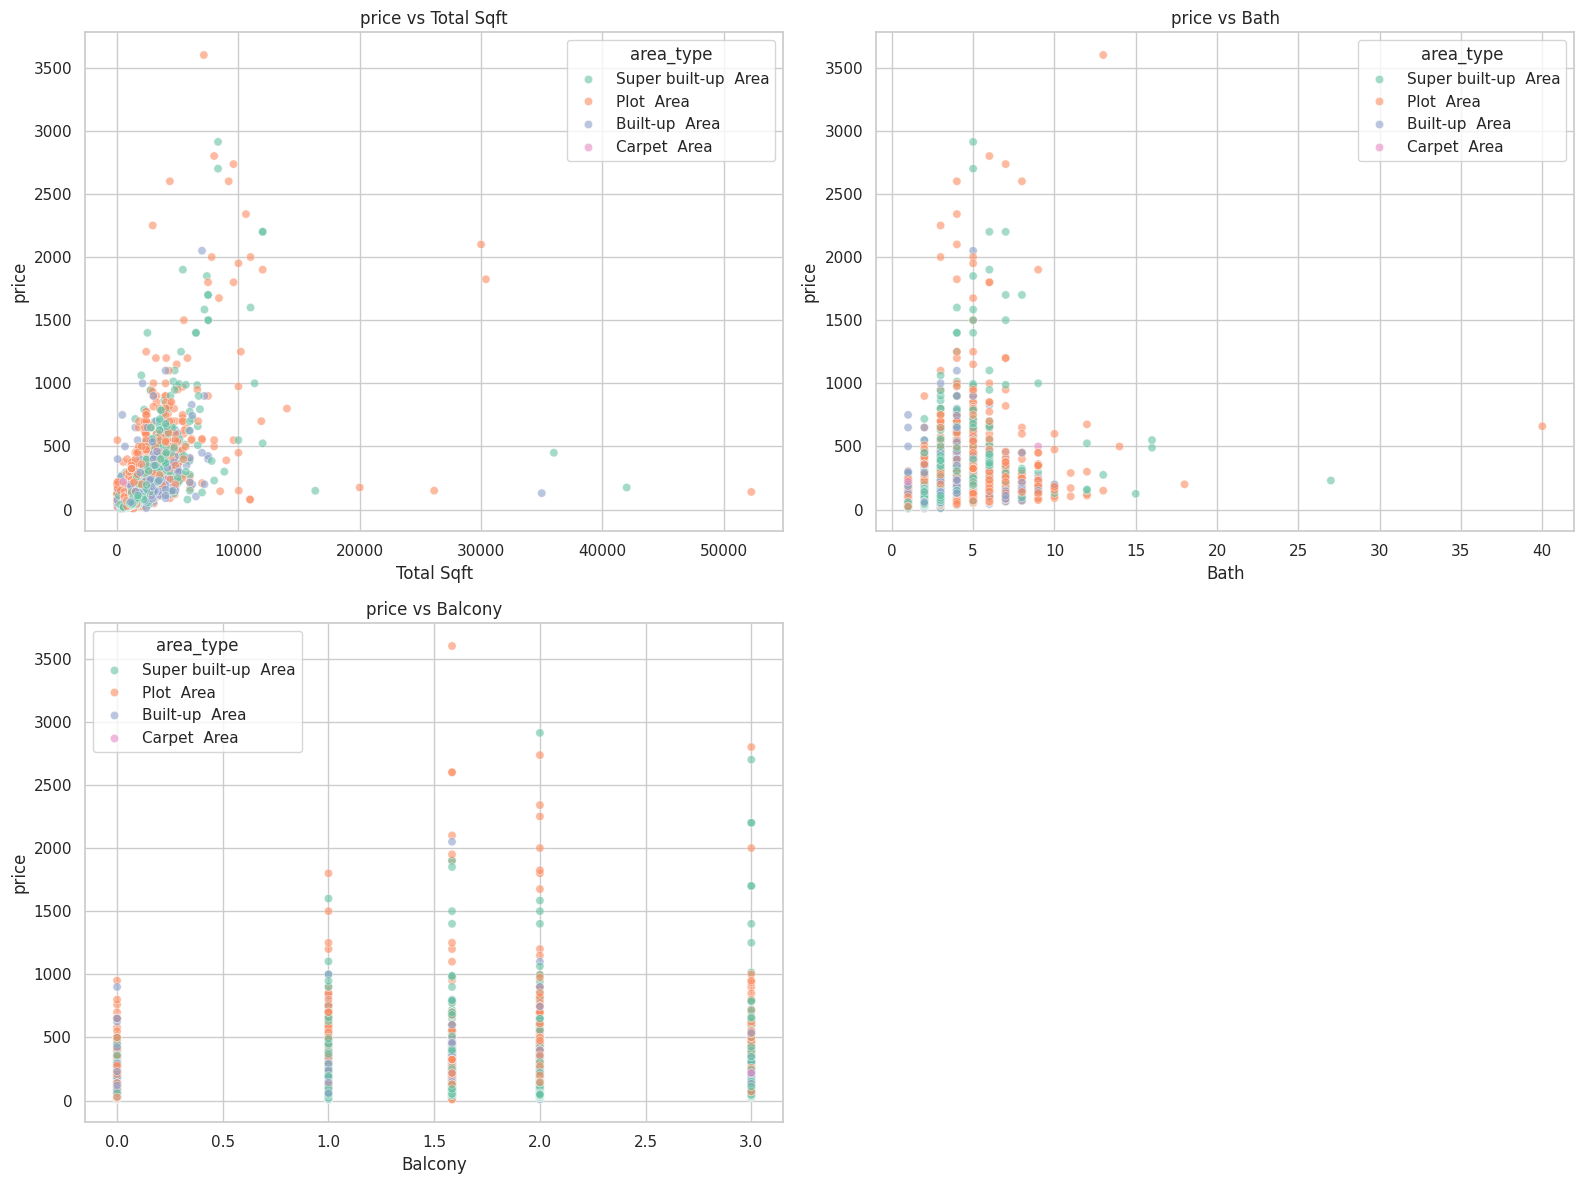

In [33]:
plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
sns.scatterplot(x='total_sqft',y='price',data=df1,hue='area_type',palette='Set2',alpha=0.6)
plt.title("price vs Total Sqft")
plt.xlabel("Total Sqft")
plt.ylabel("price")

plt.subplot(2,2,2)
sns.scatterplot(x='bath',y='price',data=df1,hue='area_type',palette='Set2',alpha=0.6)
plt.title("price vs Bath")
plt.xlabel("Bath")
plt.ylabel("price")

plt.subplot(2,2,3)
sns.scatterplot(x='balcony',y='price',data=df1,hue='area_type',palette='Set2',alpha=0.6)
plt.title("price vs Balcony")
plt.xlabel("Balcony")
plt.ylabel("price")

plt.tight_layout()
plt.show()

<ipython-input-34-27b6e626e661>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='area_type',y='price',data=df1,palette='Set2')


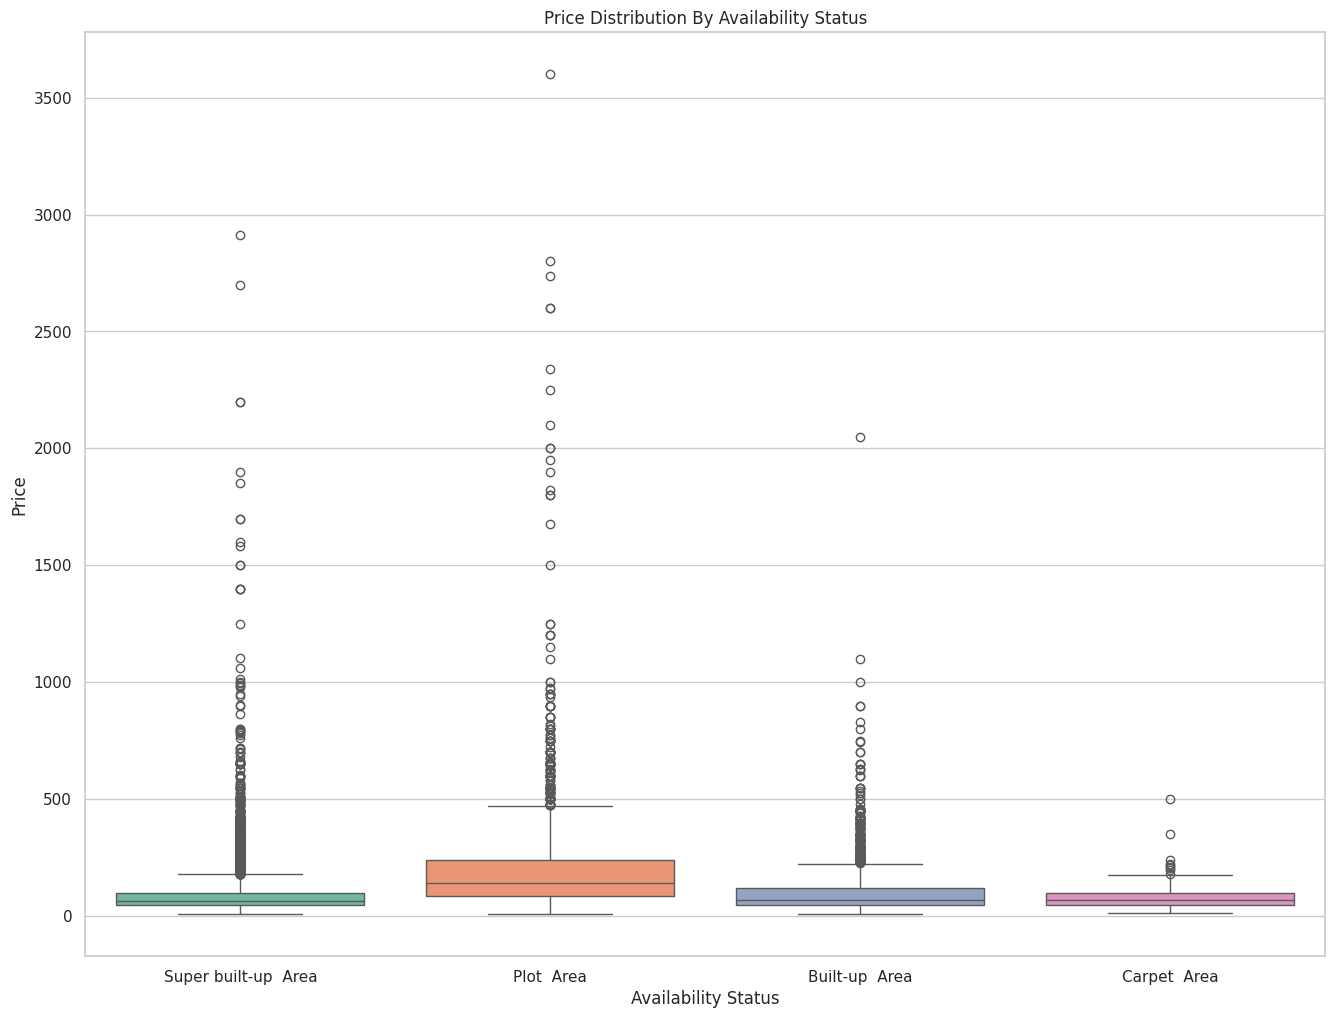

In [34]:
plt.figure(figsize=(16,12))

sns.boxplot(x='area_type',y='price',data=df1,palette='Set2')
plt.title("Price Distribution By Availability Status")
plt.xlabel("Availability Status")
plt.ylabel("Price")
plt.show()

<ipython-input-35-cb7795f0b84d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='area_type',data=df1,palette='Set1')


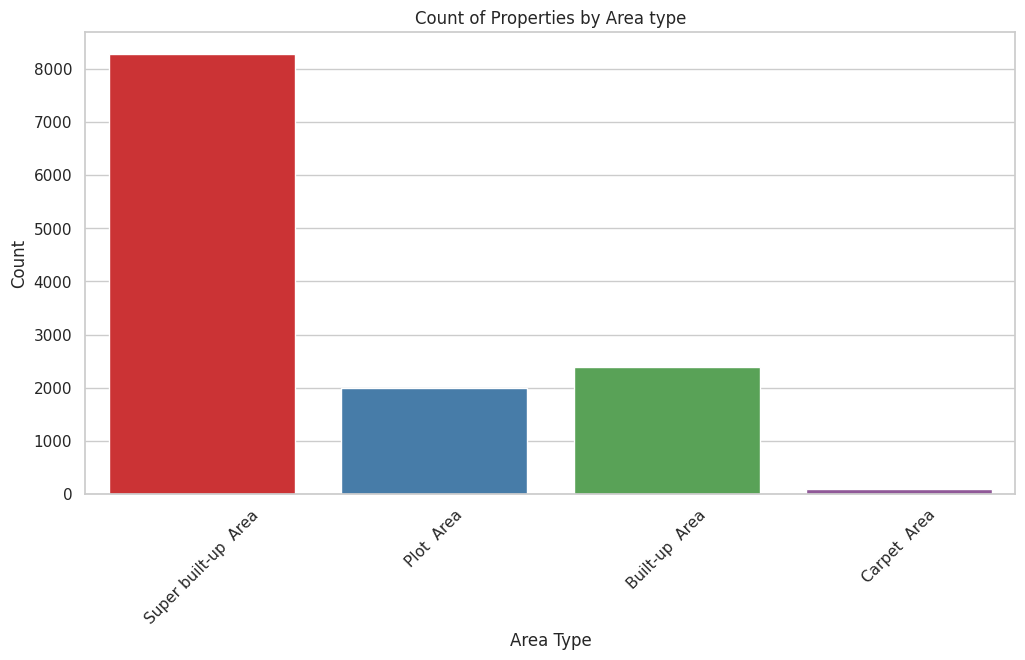

<ipython-input-35-cb7795f0b84d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='location',data=df1[df1['location'].isin(top_locations.index)],palette='Set2')


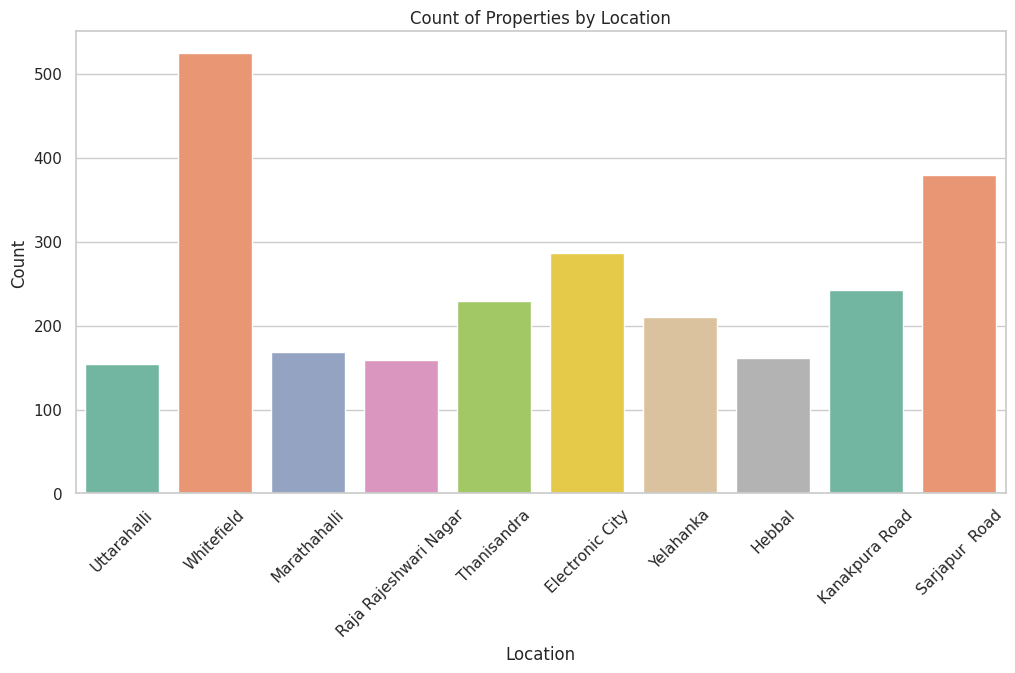

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(x='area_type',data=df1,palette='Set1')
plt.title("Count of Properties by Area type")
plt.xlabel('Area Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Location is likely to have many unique values, so we can limit the categories shown
plt.figure(figsize=(12,6))
top_locations = df1["location"].value_counts().nlargest(10)
sns.countplot(x='location',data=df1[df1['location'].isin(top_locations.index)],palette='Set2')
plt.title("Count of Properties by Location")
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Outlier Detection

In [36]:
df2 = df1.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12752 entries, 0 to 13318
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12752 non-null  object 
 1   availability  12752 non-null  object 
 2   location      12752 non-null  object 
 3   size          12752 non-null  int64  
 4   total_sqft    12752 non-null  float64
 5   bath          12752 non-null  float64
 6   balcony       12752 non-null  float64
 7   price         12752 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 896.6+ KB


In [37]:
# define a function to calculate the iqr
def detect_iqr_outliers(column):
  q1=column.quantile(0.25)
  q3=column.quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  return(column<lower_bound)| (column>upper_bound)

# select only numerical columns
#numerical_cols=df2.select_dtypes(include=['number']).columns


# apply the function to numerical columns
outliers_iqr=df2[['size','total_sqft','bath','balcony','price']].apply(detect_iqr_outliers)

# view outliers
print("outliers detected using iqr:")
print(outliers_iqr.sum())# count of outliers per column

outliers detected using iqr:
size           839
total_sqft    1164
bath          1032
balcony          0
price         1214
dtype: int64


In [38]:
# Filter out the rows with any outliers
df2 = df2[~(outliers_iqr.any(axis=1))]
print("Data after removeing outliers (IQR):")
df2

Data after removeing outliers (IQR):


,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1056.0,2.0,1.000000,39.07
2,Built-up Area,Ready To Move,Uttarahalli,3,1440.0,2.0,3.000000,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521.0,3.0,1.000000,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,1200.0,2.0,1.000000,51.00
5,Super built-up Area,Ready To Move,Whitefield,2,1170.0,2.0,1.000000,38.00
...,...,...,...,...,...,...,...,...
13309,Super built-up Area,Ready To Move,Yeshwanthpur,3,1675.0,3.0,1.584376,92.13
13310,Super built-up Area,Ready To Move,Rachenahalli,2,1050.0,2.0,2.000000,52.71
13312,Super built-up Area,Ready To Move,Bellandur,2,1262.0,2.0,2.000000,47.00
13314,Super built-up Area,Ready To Move,Green Glen Layout,3,1715.0,3.0,3.000000,112.00


<ipython-input-39-5979499e8cc6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='area_type',y='price',data=df2,palette='Set2')


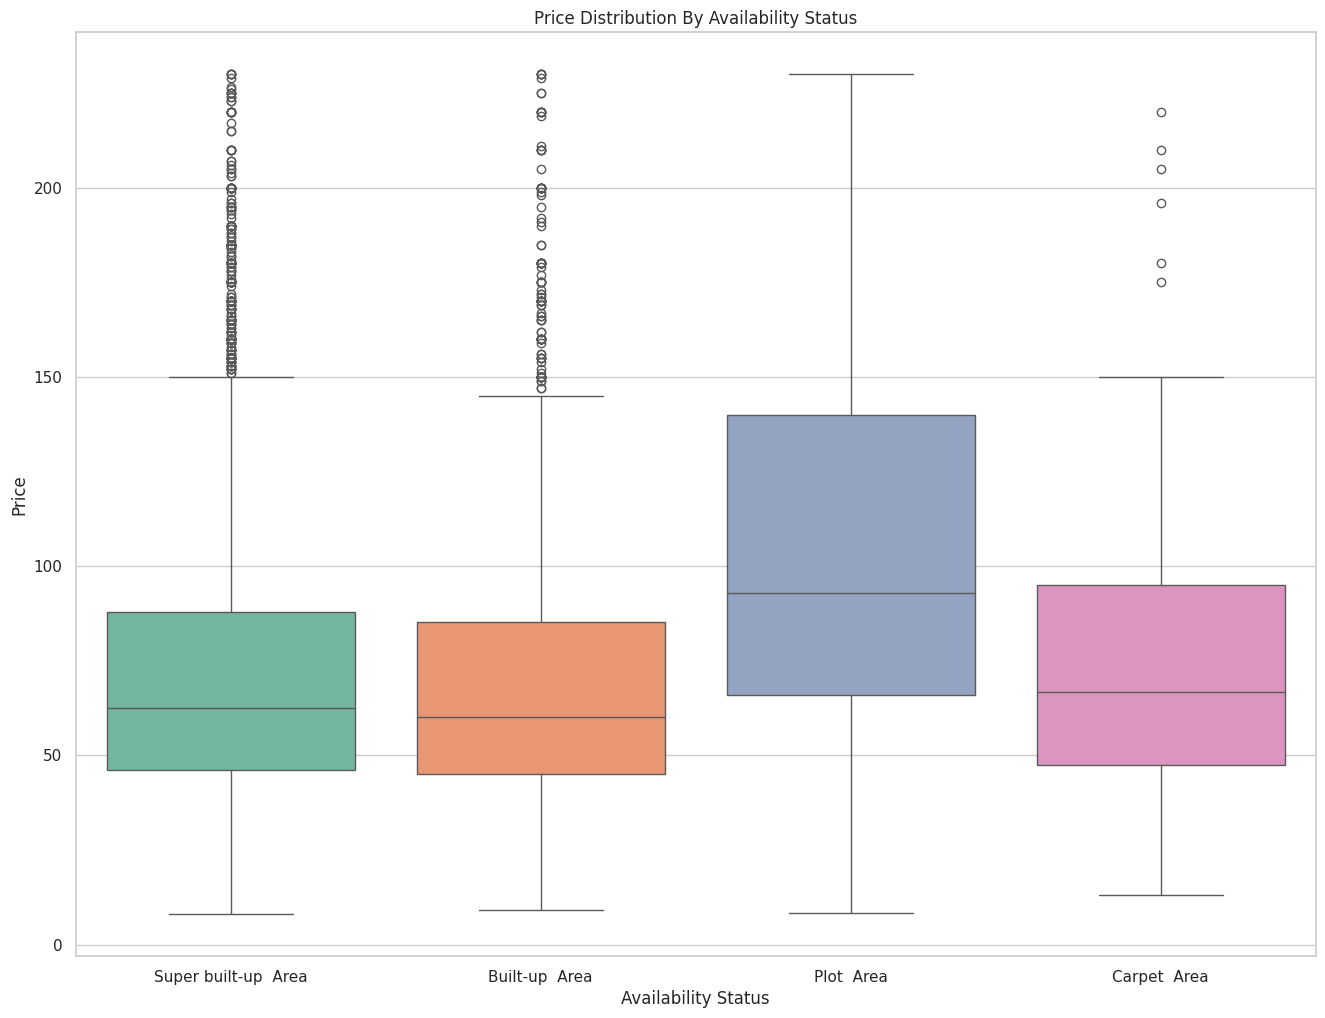

In [39]:
plt.figure(figsize=(16,12))

sns.boxplot(x='area_type',y='price',data=df2,palette='Set2')
plt.title("Price Distribution By Availability Status")
plt.xlabel("Availability Status")
plt.ylabel("Price")
plt.show()

In [40]:
import numpy as np
from scipy.stats import zscore

# compute Z-scores
z_scores = df2[['size','total_sqft','bath','balcony','price']].apply(zscore)

# Define thresold
threshold = 3

# identify outliers

outliers_z = (z_scores.abs() > threshold)

# View outliers
print("Outliers detected using Z-score: ")
print(outliers_z.sum())

Outliers detected using Z-score: 
size            0
total_sqft     60
bath            0
balcony         0
price         174
dtype: int64


# Feature Engineering

In [41]:
df3 = df2.copy()

In [42]:
df3['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-Feb', '18-Nov', '18-May', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '18-Apr',
       '20-Aug', '19-Mar', '17-Sep', '18-Dec', '17-Aug', '19-Apr',
       '18-Jun', '22-Dec', '22-Jan', '18-Aug', '19-Jan', '17-Jul',
       '18-Jul', '21-Jun', '19-Aug', '18-Sep', '17-Jun', '18-Oct',
       '21-May', '18-Jan', '20-Mar', '17-Dec', '16-Mar', '19-Jun',
       '22-Jun', '17-May', '19-Jul', '21-Feb', 'Immediate Possession',
       '19-May', '20-Oct', '20-Jun', '19-Feb', '21-Oct', '21-Jan',
       '17-Mar', '17-Nov', '17-Apr', '19-Oct', '21-Jul', '21-Nov',
       '21-Mar', '16-Dec', '22-Mar', '20-Jan', '21-Sep', '21-Aug',
       '22-May', '14-Nov', '19-Nov', '15-Nov', '16-Jul', '15-Jun',
       '20-May', '20-Nov', '20-Jul', '16-Sep', '15-Oct', '20-Feb',
       '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan', '16-Nov',
       '20-Apr', '16-Jan', '17-Feb', '14-Jul'], dtype=object)

In [43]:
df3['availability_status']=np.where(df3['availability']=='Ready To Move','Immediately Available','Available Later')
df3.drop(columns=['availability'],inplace=True)

In [44]:
df3['availability_status'].value_counts()

,count
availability_status,
Immediately Available,8251
Available Later,2323


#Feature Transformation

In [45]:
skewness = df3[['size','total_sqft','bath','balcony','price']].skew()
print(skewness)

size          0.127235
total_sqft    0.488863
bath          0.572639
balcony       0.057792
price         1.311835
dtype: float64


In [46]:
skewness = df1[['size','total_sqft','bath','balcony','price']].skew()
print(skewness)

size           4.798262
total_sqft    15.075517
bath           4.210551
balcony        0.009517
price          7.945364
dtype: float64


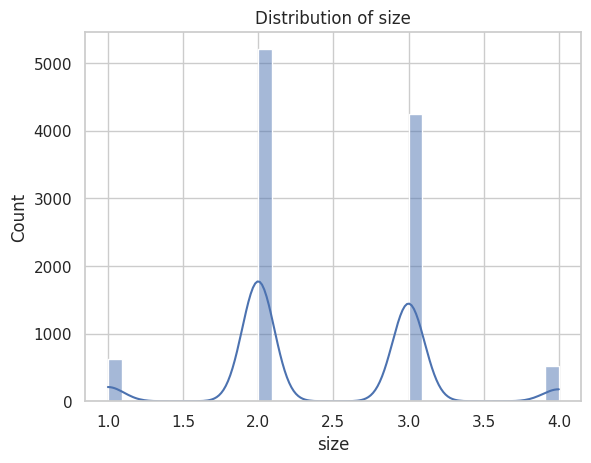

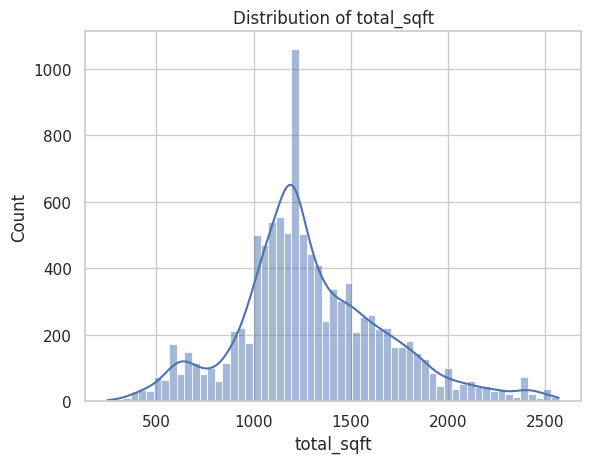

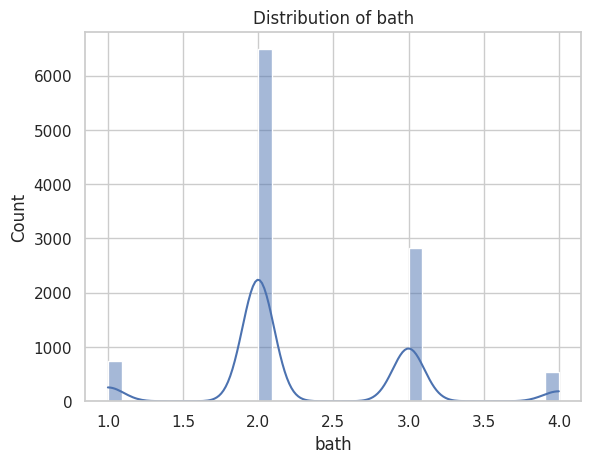

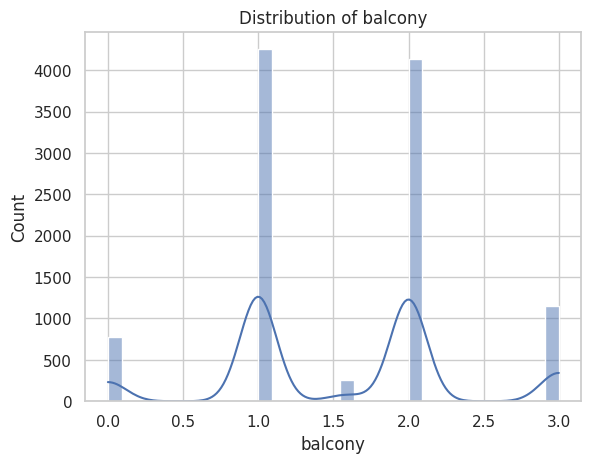

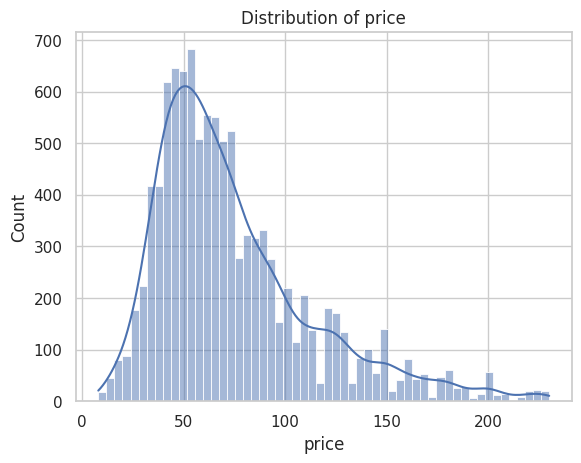

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['size','total_sqft','bath','balcony','price']:
  sns.histplot(df3[col],kde=True)
  plt.title(f"Distribution of {col}")
  plt.show(    )

In [48]:
df3['price_log'] = np.log1p(df3['price'])

df3['price_sqrt'] = np.sqrt(df3['price'])

print(df3[['price','price_log','price_sqrt']])

        price  price_log  price_sqrt
0       39.07   3.690628    6.250600
2       62.00   4.143135    7.874008
3       95.00   4.564348    9.746794
4       51.00   3.951244    7.141428
5       38.00   3.663562    6.164414
...       ...        ...         ...
13309   92.13   4.533996    9.598437
13310   52.71   3.983599    7.260165
13312   47.00   3.871201    6.855655
13314  112.00   4.727388   10.583005
13317   60.00   4.110874    7.745967

[10574 rows x 3 columns]


In [49]:
skewness =df3[['price','price_log','price_sqrt']].skew()
print(skewness)

price         1.311835
price_log    -0.031273
price_sqrt    0.671824
dtype: float64


In [50]:
df3.drop(columns=['price_sqrt','price'],inplace=True)

# Encoding

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df3['location'] = le.fit_transform(df3['location'])

df3['location'].dtype

dtype('int64')

In [52]:
location_labels = dict(zip(le.classes_,range(len(le.classes_))))
print(location_labels)

{' Anekal': 0, ' Banaswadi': 1, ' Basavangudi': 2, ' Bhoganhalli': 3, ' Devarabeesana Halli': 4, ' Devarachikkanahalli': 5, ' Electronic City': 6, ' Mysore Highway': 7, ' Rachenahalli': 8, ' Thanisandra': 9, ' Whitefield': 10, ' ittamadu': 11, '12th cross srinivas nagar banshankari 3rd stage': 12, '1st Block BEL Layout': 13, '1st Block HBR Layout': 14, '1st Block HRBR Layout': 15, '1st Block Jayanagar': 16, '1st Block Koramangala': 17, '1st Phase JP Nagar': 18, '1st Stage Domlur': 19, '1st Stage Indira Nagar': 20, '2nd Block Bel Layout': 21, '2nd Block Hrbr Layout': 22, '2nd Block Jayanagar': 23, '2nd Phase JP Nagar': 24, '2nd Phase Judicial Layout': 25, '2nd Stage Arekere Mico Layout': 26, '2nd Stage Nagarbhavi': 27, '2nd phase jp nagar, jp nagar': 28, '3rd Block Banashankari': 29, '3rd Block HBR Layout': 30, '3rd Block Hrbr Layout': 31, '3rd Block Jayanagar': 32, '3rd Block Koramangala': 33, '3rd Phase Iti Layout': 34, '3rd Phase JP Nagar': 35, '3rd Stage Raja Rajeshwari Nagar': 36, 

In [53]:
df3['area_type'].unique()

array(['Super built-up  Area', 'Built-up  Area', 'Plot  Area',
       'Carpet  Area'], dtype=object)

In [54]:
df3['area_type']=df3['area_type'].map({'Super built-up  Area':1, 'Built-up  Area':2, 'Plot  Area':3,
       'Carpet  Area':4})
df3

,area_type,location,size,total_sqft,bath,balcony,availability_status,price_log
0,1,354,2,1056.0,2.0,1.000000,Available Later,3.690628
2,2,1008,3,1440.0,2.0,3.000000,Immediately Available,4.143135
3,1,651,3,1521.0,3.0,1.000000,Immediately Available,4.564348
4,1,617,2,1200.0,2.0,1.000000,Immediately Available,3.951244
5,1,1069,2,1170.0,2.0,1.000000,Immediately Available,3.663562
...,...,...,...,...,...,...,...,...
13309,1,1082,3,1675.0,3.0,1.584376,Immediately Available,4.533996
13310,1,819,2,1050.0,2.0,2.000000,Immediately Available,3.983599
13312,1,193,2,1262.0,2.0,2.000000,Immediately Available,3.871201
13314,1,402,3,1715.0,3.0,3.000000,Immediately Available,4.727388


In [55]:
df3['availability_status'].unique()

array(['Available Later', 'Immediately Available'], dtype=object)

In [56]:
one_hot_encoded = pd.get_dummies(df3['availability_status'],prefix='Onehot',dtype=int)
df3=pd.concat([df3,one_hot_encoded],axis=1)
df3.drop(columns=['availability_status'],inplace=True)
df3

,area_type,location,size,total_sqft,bath,balcony,price_log,Onehot_Available Later,Onehot_Immediately Available
0,1,354,2,1056.0,2.0,1.000000,3.690628,1,0
2,2,1008,3,1440.0,2.0,3.000000,4.143135,0,1
3,1,651,3,1521.0,3.0,1.000000,4.564348,0,1
4,1,617,2,1200.0,2.0,1.000000,3.951244,0,1
5,1,1069,2,1170.0,2.0,1.000000,3.663562,0,1
...,...,...,...,...,...,...,...,...,...
13309,1,1082,3,1675.0,3.0,1.584376,4.533996,0,1
13310,1,819,2,1050.0,2.0,2.000000,3.983599,0,1
13312,1,193,2,1262.0,2.0,2.000000,3.871201,0,1
13314,1,402,3,1715.0,3.0,3.000000,4.727388,0,1


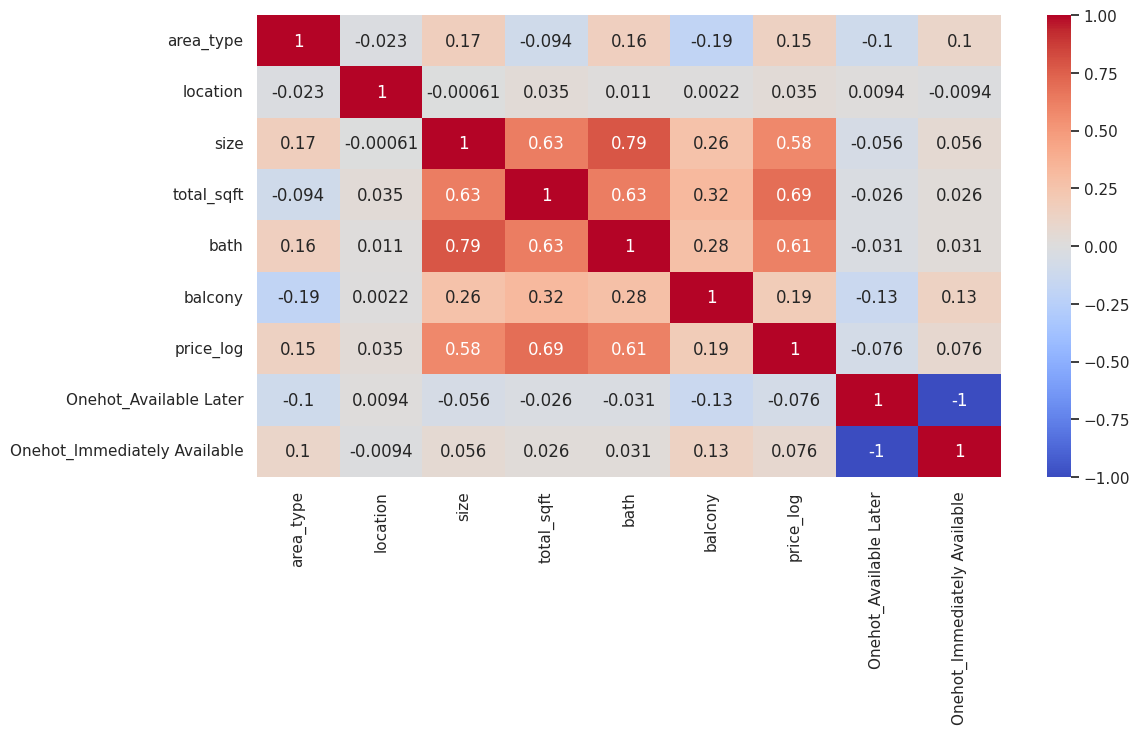

In [57]:
plt.figure(figsize=(12,6))
sns.heatmap(df3.corr(),annot=True,cmap='coolwarm')
plt.show()

In [58]:
df3.drop(columns=['Onehot_Available Later','Onehot_Immediately Available','location','area_type'],inplace=True)
df3

,size,total_sqft,bath,balcony,price_log
0,2,1056.0,2.0,1.000000,3.690628
2,3,1440.0,2.0,3.000000,4.143135
3,3,1521.0,3.0,1.000000,4.564348
4,2,1200.0,2.0,1.000000,3.951244
5,2,1170.0,2.0,1.000000,3.663562
...,...,...,...,...,...
13309,3,1675.0,3.0,1.584376,4.533996
13310,2,1050.0,2.0,2.000000,3.983599
13312,2,1262.0,2.0,2.000000,3.871201
13314,3,1715.0,3.0,3.000000,4.727388


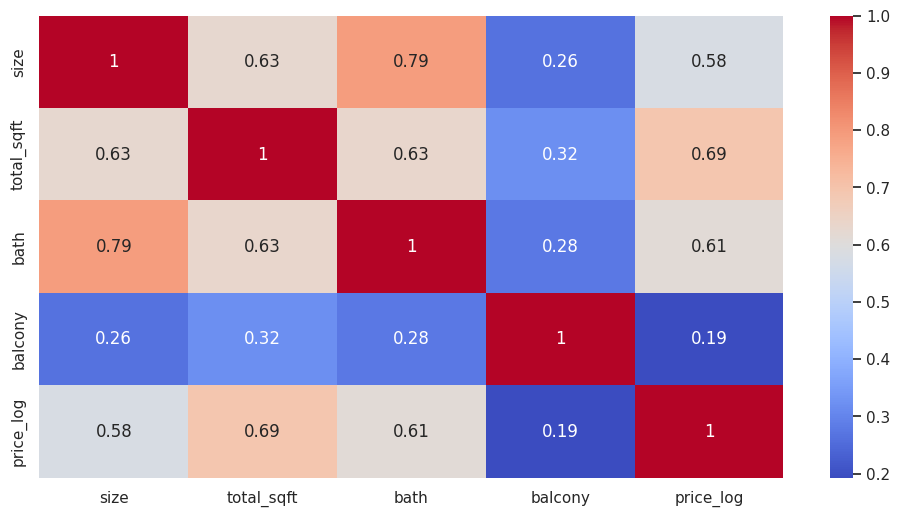

In [59]:
plt.figure(figsize=(12,6))
sns.heatmap(df3.corr(),annot=True,cmap='coolwarm')
plt.show()

# Scaleing

In [60]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10574 entries, 0 to 13317
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   size        10574 non-null  int64  
 1   total_sqft  10574 non-null  float64
 2   bath        10574 non-null  float64
 3   balcony     10574 non-null  float64
 4   price_log   10574 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 495.7 KB


In [61]:
df3

,size,total_sqft,bath,balcony,price_log
0,2,1056.0,2.0,1.000000,3.690628
2,3,1440.0,2.0,3.000000,4.143135
3,3,1521.0,3.0,1.000000,4.564348
4,2,1200.0,2.0,1.000000,3.951244
5,2,1170.0,2.0,1.000000,3.663562
...,...,...,...,...,...
13309,3,1675.0,3.0,1.584376,4.533996
13310,2,1050.0,2.0,2.000000,3.983599
13312,2,1262.0,2.0,2.000000,3.871201
13314,3,1715.0,3.0,3.000000,4.727388


## MinMaxScaler

In [62]:
from sklearn.preprocessing import MinMaxScaler

# MinMax Scaling
minmax_scaler=MinMaxScaler()
df_minmax_scaled = minmax_scaler.fit_transform(df3)

In [63]:
df_minmax_scaled

array([[0.33333333, 0.34756361, 0.33333333, 0.33333333, 0.46018936],
       [0.66666667, 0.51315222, 0.33333333, 1.        , 0.59962846],
       [0.66666667, 0.54808107, 0.66666667, 0.33333333, 0.72942457],
       ...,
       [0.33333333, 0.436395  , 0.33333333, 0.66666667, 0.51583261],
       [0.66666667, 0.63173782, 0.66666667, 1.        , 0.77966492],
       [0.33333333, 0.38421734, 0.33333333, 0.33333333, 0.58968733]])

In [64]:
df_minmax_scaled = pd.DataFrame(df_minmax_scaled, columns=df3.columns)
df_minmax_scaled

,size,total_sqft,bath,balcony,price_log
0,0.333333,0.347564,0.333333,0.333333,0.460189
1,0.666667,0.513152,0.333333,1.000000,0.599628
2,0.666667,0.548081,0.666667,0.333333,0.729425
3,0.333333,0.409659,0.333333,0.333333,0.540498
4,0.333333,0.396723,0.333333,0.333333,0.451849
...,...,...,...,...,...
10569,0.666667,0.614489,0.666667,0.528125,0.720072
10570,0.333333,0.344976,0.333333,0.666667,0.550468
10571,0.333333,0.436395,0.333333,0.666667,0.515833
10572,0.666667,0.631738,0.666667,1.000000,0.779665


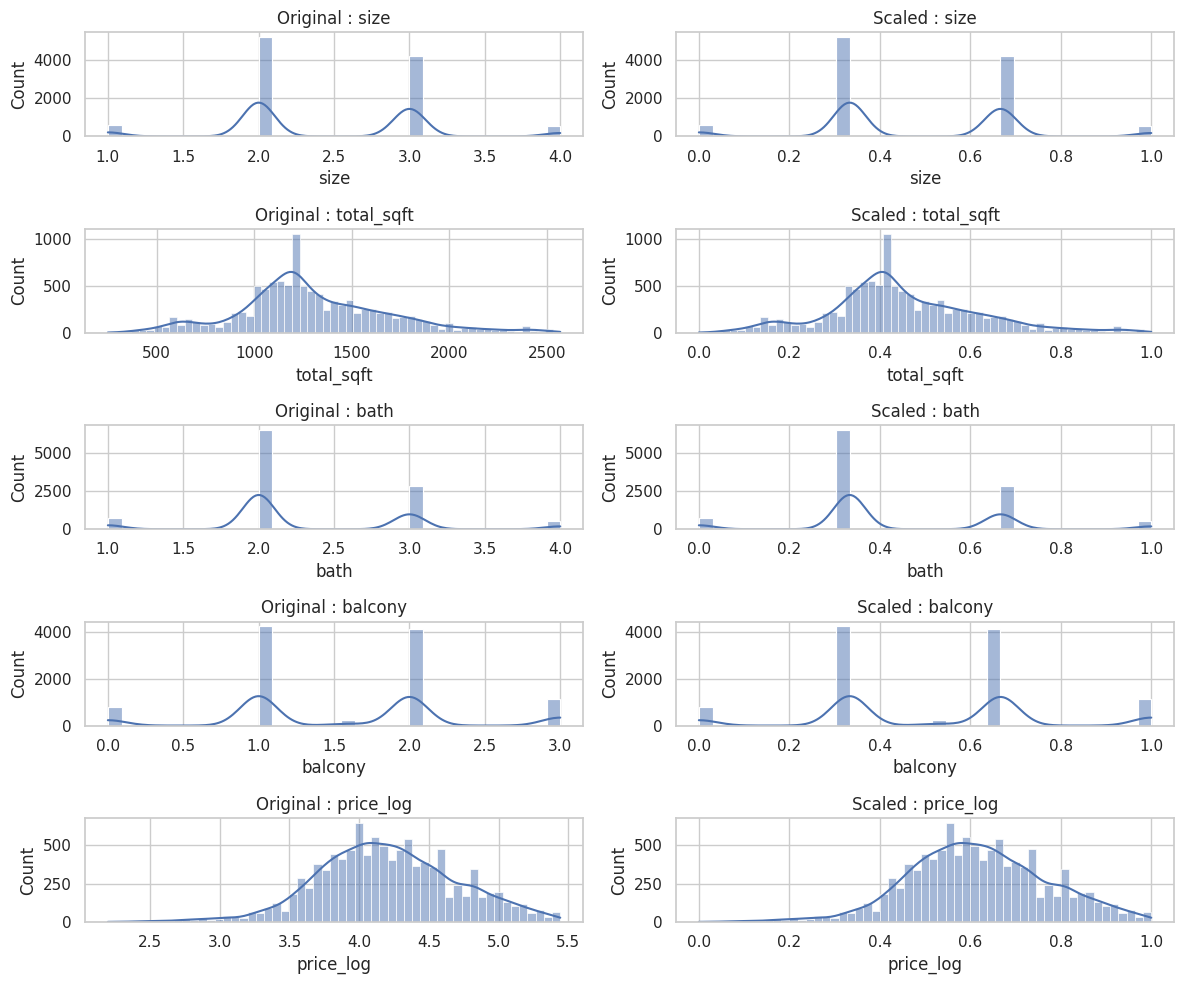

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))

plt.subplot(5,2,1)
sns.histplot(df3['size'],kde=True)
plt.title('Original : size')

plt.subplot(5,2,2)
sns.histplot(df_minmax_scaled['size'],kde=True)
plt.title('Scaled : size')

plt.subplot(5,2,3)
sns.histplot(df3['total_sqft'],kde=True)
plt.title('Original : total_sqft')

plt.subplot(5,2,4)
sns.histplot(df_minmax_scaled['total_sqft'],kde=True)
plt.title('Scaled : total_sqft')

plt.subplot(5,2,5)
sns.histplot(df3['bath'],kde=True)
plt.title('Original : bath')

plt.subplot(5,2,6)
sns.histplot(df_minmax_scaled['bath'],kde=True)
plt.title('Scaled : bath')

plt.subplot(5,2,7)
sns.histplot(df3['balcony'],kde=True)
plt.title('Original : balcony')

plt.subplot(5,2,8)
sns.histplot(df_minmax_scaled['balcony'],kde=True)
plt.title('Scaled : balcony')

plt.subplot(5,2,9)
sns.histplot(df3['price_log'],kde=True)
plt.title('Original : price_log')

plt.subplot(5,2,10)
sns.histplot(df_minmax_scaled['price_log'],kde=True)
plt.title('Scaled : price_log')

plt.tight_layout()
plt.show()

## Standard Scaler

In [66]:
from sklearn.preprocessing import StandardScaler

# MinMax Scaling
standard_scaler=StandardScaler()
df_standard_scaled = standard_scaler.fit_transform(df3)

In [67]:
df_standard_scaled

array([[-0.64856754, -0.62483187, -0.44338999, -0.70540871, -1.02925132],
       [ 0.82372812,  0.37478347, -0.44338999,  1.86167252, -0.120277  ],
       [ 0.82372812,  0.58563983,  1.04925749, -0.70540871,  0.72583674],
       ...,
       [-0.64856754, -0.08857989, -0.44338999,  0.57813191, -0.66652462],
       [ 0.82372812,  1.09065383,  1.04925749,  1.86167252,  1.05334305],
       [-0.64856754, -0.40356285, -0.44338999, -0.70540871, -0.1850811 ]])

In [68]:
df_standard_scaled = pd.DataFrame(df_standard_scaled, columns=df3.columns)
df_standard_scaled

,size,total_sqft,bath,balcony,price_log
0,-0.648568,-0.624832,-0.443390,-0.705409,-1.029251
1,0.823728,0.374783,-0.443390,1.861673,-0.120277
2,0.823728,0.585640,1.049257,-0.705409,0.725837
3,-0.648568,-0.249976,-0.443390,-0.705409,-0.505739
4,-0.648568,-0.328071,-0.443390,-0.705409,-1.083621
...,...,...,...,...,...
10569,0.823728,0.986527,1.049257,0.044661,0.664867
10570,-0.648568,-0.640451,-0.443390,0.578132,-0.440744
10571,-0.648568,-0.088580,-0.443390,0.578132,-0.666525
10572,0.823728,1.090654,1.049257,1.861673,1.053343


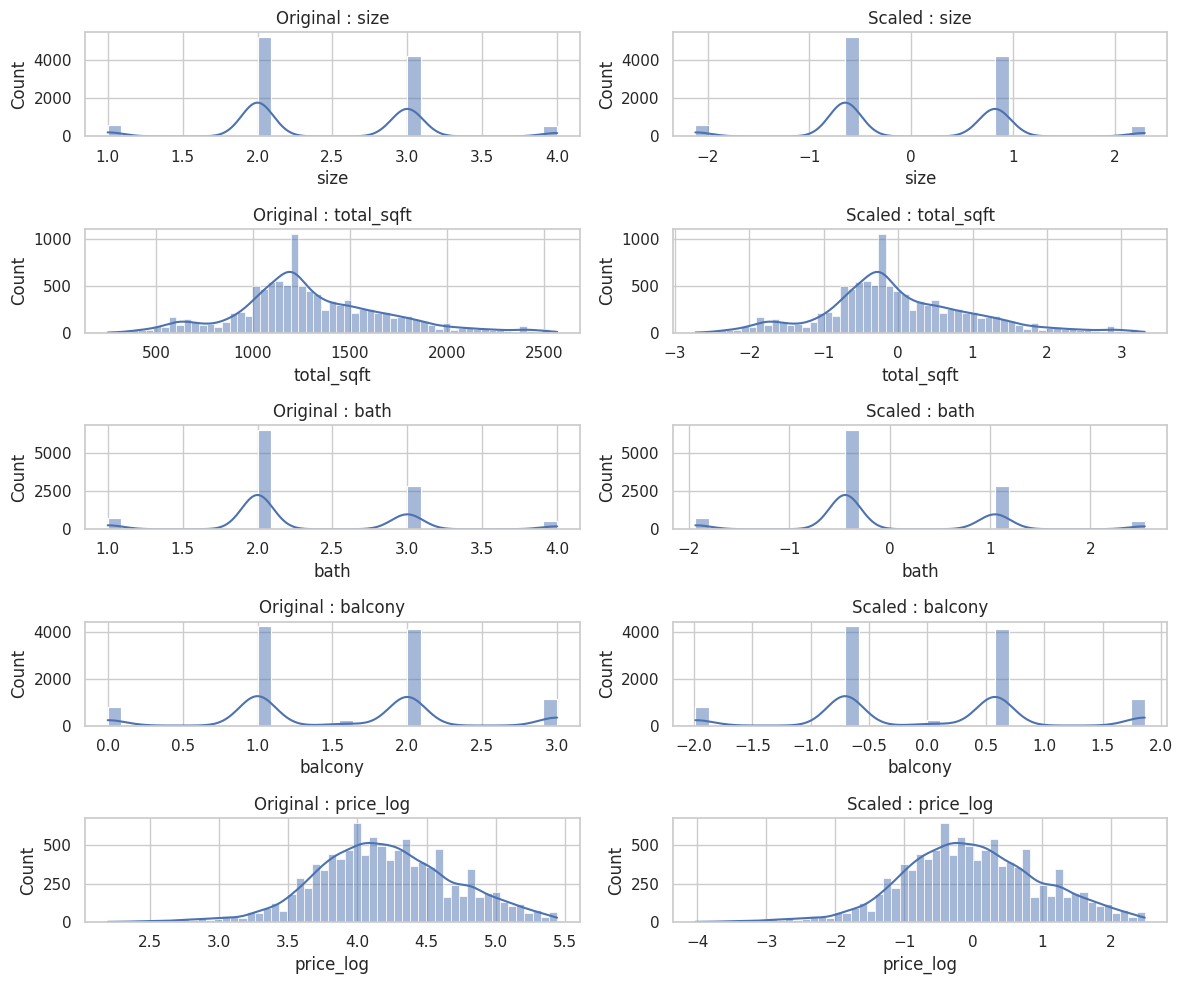

In [69]:
plt.figure(figsize=(12,10))

plt.subplot(5,2,1)
sns.histplot(df3['size'],kde=True)
plt.title('Original : size')

plt.subplot(5,2,2)
sns.histplot(df_standard_scaled['size'],kde=True)
plt.title('Scaled : size')

plt.subplot(5,2,3)
sns.histplot(df3['total_sqft'],kde=True)
plt.title('Original : total_sqft')

plt.subplot(5,2,4)
sns.histplot(df_standard_scaled['total_sqft'],kde=True)
plt.title('Scaled : total_sqft')

plt.subplot(5,2,5)
sns.histplot(df3['bath'],kde=True)
plt.title('Original : bath')

plt.subplot(5,2,6)
sns.histplot(df_standard_scaled['bath'],kde=True)
plt.title('Scaled : bath')

plt.subplot(5,2,7)
sns.histplot(df3['balcony'],kde=True)
plt.title('Original : balcony')

plt.subplot(5,2,8)
sns.histplot(df_standard_scaled['balcony'],kde=True)
plt.title('Scaled : balcony')

plt.subplot(5,2,9)
sns.histplot(df3['price_log'],kde=True)
plt.title('Original : price_log')

plt.subplot(5,2,10)
sns.histplot(df_standard_scaled['price_log'],kde=True)
plt.title('Scaled : price_log')

plt.tight_layout()
plt.show()

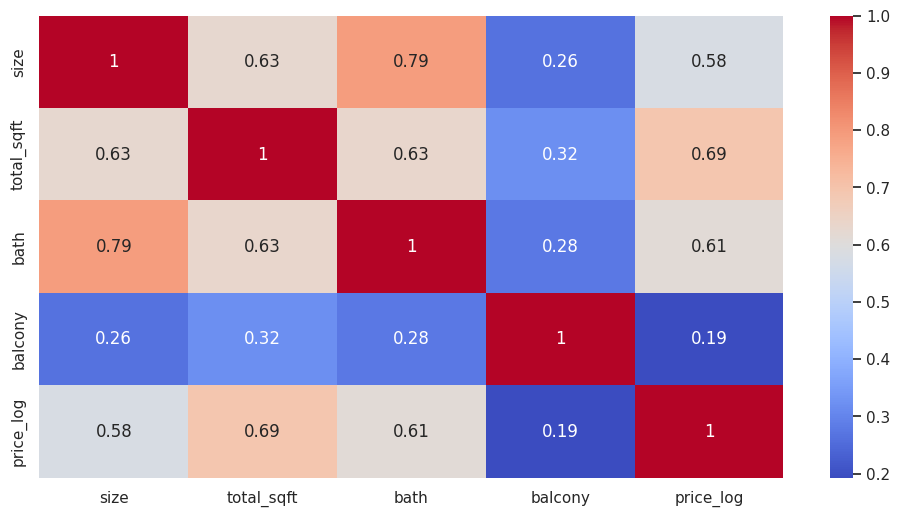

In [70]:
plt.figure(figsize=(12,6))
sns.heatmap(df3.corr(),annot=True,cmap='coolwarm')
plt.show()

In [71]:
X = df_minmax_scaled.drop(columns=['price_log'])
y = df_minmax_scaled['price_log']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import r2_score, mean_squared_error

# y_train_pred = model.predict(X_train)
# r2_train = r2_score(y_train, y_train_pred)
# mse_train = mean_squared_error(y_train, y_train_pred)

# Validation Prediction
y_val_pred = model.predict(X_test)
r2_val = r2_score(y_test, y_val_pred)
mse_val = mean_squared_error(y_test, y_val_pred)

print("R2 Score = ",r2_val)
print("MSE = ",mse_val)

R2 Score =  0.55118849900247
MSE =  0.01081306057756761


# Dimensionality Reduction

# PCA

In [72]:
X = df_standard_scaled.drop(columns=['price_log'])
y = df_standard_scaled['price_log']

In [73]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

In [74]:
X_pca

array([[-1.15809994, -0.37271028, -0.0426175 ,  0.15272905],
       [ 0.98347658,  1.63178655, -0.06297264, -0.92059265],
       [ 1.13999261, -1.13217426, -0.09198106,  0.17373127],
       ...,
       [-0.47961224,  0.806228  ,  0.2479503 ,  0.13344137],
       [ 2.19840119,  1.25811563,  0.00765063,  0.13761691],
       [-1.04168627, -0.3853485 ,  0.14512485,  0.15176949]])

# Training the model

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca,y,test_size=0.2,random_state=42)

In [76]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8459, 4)
(2115, 4)
(8459,)
(2115,)


In [77]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [78]:
from sklearn.metrics import r2_score, mean_squared_error

y_val_pred = model.predict(X_test)
r2_val = r2_score(y_test, y_val_pred)
mse_val = mean_squared_error(y_test, y_val_pred)

print("R2 Score = ",r2_val)
print("MSE = ",mse_val)

R2 Score =  0.5511884990024699
MSE =  0.45949705786167777
